In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from tqdm import tqdm
import datetime

sns.set_style('darkgrid')
pd.options.display.max_rows = None

In [2]:
pairs = np.load('./item_purcharse_together/pairs.npy',allow_pickle=True)
uucf_df = pd.read_csv('./user-user_collaborative_filltering/uucf.csv')

transactions = pd.read_csv('../../data/transactions_train_sample.csv',dtype={"article_id": "str"})
transactions = transactions[['customer_id','article_id','t_dat']]
transactions["t_dat"] = pd.to_datetime(transactions["t_dat"])

In [3]:
transaction_1mon = transactions.loc[
    transactions.t_dat >= pd.to_datetime('2020-08-22')].copy()

In [4]:
uucf_df.customer_id.unique().shape

(1364,)

In [17]:
transaction_1mon.customer_id.unique().shape

(267,)

<AxesSubplot:xlabel='transaction_count', ylabel='Count'>

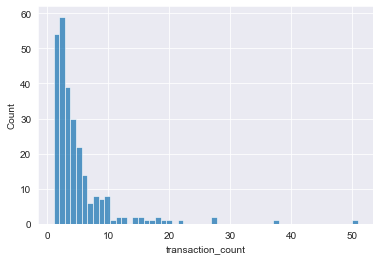

In [5]:
tmp = transaction_1mon.groupby('customer_id').article_id.count().reset_index()
tmp.columns = ['customer_id','transaction_count']
sns.histplot(data=tmp,x='transaction_count')